<a href="https://colab.research.google.com/github/LuciferHacked786/cats-vs-dogs-image-classifier/blob/main/cats_and_dogs_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohitkumarkashyap","key":"163fd5d573acb7a6ec33d52bbcacb8a6"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 57% 124M/218M [00:00<00:00, 1.29GB/s]
100% 218M/218M [00:00<00:00, 795MB/s] 


In [9]:
import zipfile
with zipfile.ZipFile("cat-and-dog.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = "dataset/training_set/training_set"

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.5453 - loss: 0.7274 - val_accuracy: 0.6421 - val_loss: 0.6785
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.6524 - loss: 0.6271 - val_accuracy: 0.6977 - val_loss: 0.5877
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.7052 - loss: 0.5628 - val_accuracy: 0.7077 - val_loss: 0.5605
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.7586 - loss: 0.4915 - val_accuracy: 0.7570 - val_loss: 0.5065
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.7970 - loss: 0.4325 - val_accuracy: 0.7689 - val_loss: 0.4961
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.8419 - loss: 0.3494 - val_accuracy: 0.7683 - val_loss: 0.4896
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.9009 - loss: 0.2373 - val_accuracy: 0.7920 - val_loss: 0.5382
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9342 - loss: 0.1730 - val_accurac

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.7959 - loss: 0.8296
Validation Accuracy: 79.45%


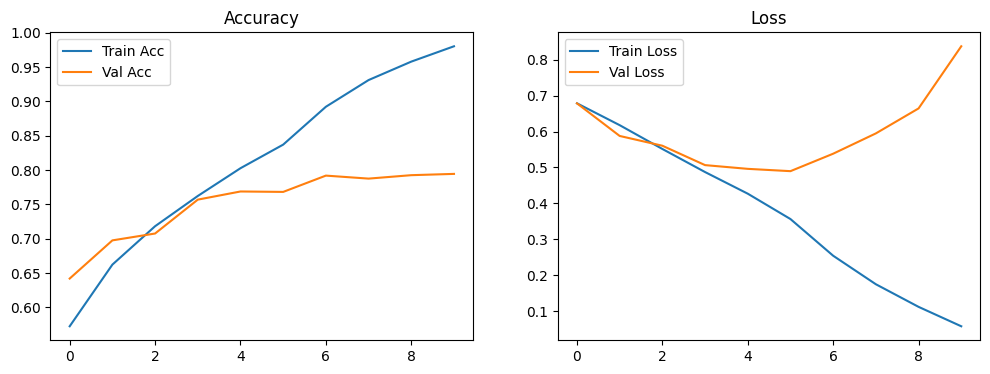

In [13]:
loss, acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {acc*100:.2f}%")

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

In [15]:
model.save("model.h5")

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

model = load_model("model.h5")

def predict(img_path):
    img = image.load_img(img_path, target_size=(150,150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return "Dog 🐶" if prediction > 0.5 else "Cat 🐱"

In [18]:
uploaded = files.upload()
for fn in uploaded.keys():
    print(predict(fn))

Saving download.jpeg to download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Dog 🐶
